# 2023-08-Hilary

In [1]:
import contextily
import json
import datetime
import shapely.geometry
from datetime import timezone
from geopandas import GeoDataFrame
from pystac_client import Client

earth_search = Client.open("https://earth-search.aws.element84.com/v1/")
formed = datetime.datetime(2023, 8, 16, tzinfo=timezone.utc)
dissipated = datetime.datetime(2023, 8, 21, tzinfo=timezone.utc)
# https://www.nhc.noaa.gov/gis/best_track/ep092023_best_track.zip
best_track = GeoDataFrame.from_file("data/ep092023_best_track/EP092023_lin.shp")
# https://geohub.lacity.org/datasets/10f1e37c065347e693cf4e8ee753c09b/explore
# The third one is the onshore part of the county
with open("data/la-county.json") as f:
    la_county = shapely.geometry.shape(json.load(f)["features"][3]["geometry"])

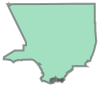

In [2]:
la_county

<Axes: >

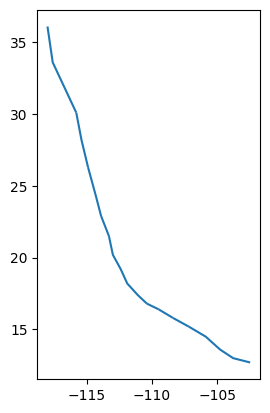

In [3]:
best_track.plot()

In [4]:
search = earth_search.search(
    collections=["sentinel-2-l2a"],
    datetime=[formed, dissipated],
    intersects=la_county,
)
sentinel2_items = search.item_collection()
sentinel2_items.save_object("data/sentinel-2-l2a.json")

In [5]:
for item in sentinel2_items:
    print(item.datetime)

2023-08-19 18:55:00.226000+00:00
2023-08-19 18:54:49.639000+00:00
2023-08-16 18:45:08.572000+00:00
2023-08-16 18:45:04.968000+00:00
2023-08-16 18:44:54.089000+00:00
2023-08-16 18:44:50.625000+00:00


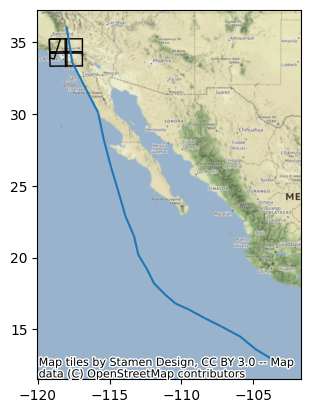

In [6]:
item_data_frame = GeoDataFrame.from_features(sentinel2_items, crs="EPSG:4326")
axis = item_data_frame[["geometry"]].plot(facecolor="none")
best_track.plot(ax=axis)
contextily.add_basemap(axis, crs=item_data_frame.crs.to_string())

In [7]:
search = earth_search.search(
    collections=["sentinel-1-grd"],
    datetime=[formed, dissipated],
    intersects=la_county,
)
sentinel1_items = search.item_collection()
sentinel1_items.save_object("data/sentinel-1-grd.json")

In [8]:
for item in sentinel1_items:
    print(item.datetime)

2023-08-17 14:01:04.407847+00:00
2023-08-17 01:59:09.663371+00:00
2023-08-17 01:58:42.645323+00:00


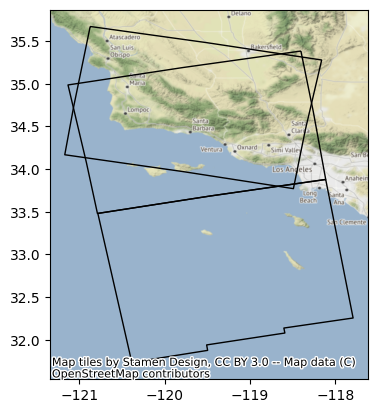

In [10]:
item_data_frame = GeoDataFrame.from_features(sentinel1_items, crs="EPSG:4326")
axis = item_data_frame[["geometry"]].plot(facecolor="none")
contextily.add_basemap(axis, crs=item_data_frame.crs.to_string())